<a href="https://colab.research.google.com/github/ElenaNtm/power-thefts-investigation/blob/main/models(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
import pandas as pd 
import numpy as np
import math
import operator 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

#scoring 
#def rmsle(y, y_pred):
    #return np.sqrt(mean_squared_error(y, y_pred))

#Data

In [ ]:
path = "/content/drive/MyDrive/HEDNO/Edo_ola/train_data.csv"
train = pd.read_csv(path)

In [ ]:
path = "/content/drive/MyDrive/HEDNO/Edo_ola/test_data.csv"
test = pd.read_csv(path)

#Model HistGradientBoostingClassifier() NOT TO RUN

In [ ]:
hgbm = HistGradientBoostingClassifier(l2_regularization=3, learning_rate=0.5, random_state=42, class_weight="balanced")
hgbm.fit(X_train, y_train)
hgbm.score(X_test, y_test)

0.8082376229207083

In [ ]:
# balanced accurancy
balanced_accuracy_score(y_test, hgbm.predict(X_test))

0.7937244078356529

Χωρις το balanced η ισορροπημενη ακριβεια θα ηταν 

In [ ]:
#hgbm_no = HistGradientBoostingClassifier(l2_regularization=3, learning_rate=0.5, random_state=42)
#hgbm_no.fit(X_train, y_train)
# balanced accurancy
#balanced_accuracy_score(y_test, hgbm_no.predict(X_test))

##Confusion Matrix

<Axes: >

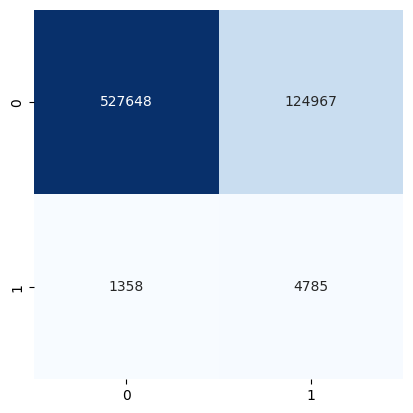

In [ ]:
conf_mat = confusion_matrix(y_test, hgbm.predict(X_test))
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

# Balanced Random Forest NOT TO RUN

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
brf = BalancedRandomForestClassifier(n_estimators=200,random_state=42, n_jobs=-1)
brf.fit(X_train, y_train)
brf.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.de

0.7893702998673261

In [ ]:
# Balanced accurancy
balanced_accuracy_score(y_test, brf.predict(X_test))

0.8187104357902153

In [ ]:
#BalancedRandomForestClassifier().get_params(deep=True)

<Axes: >

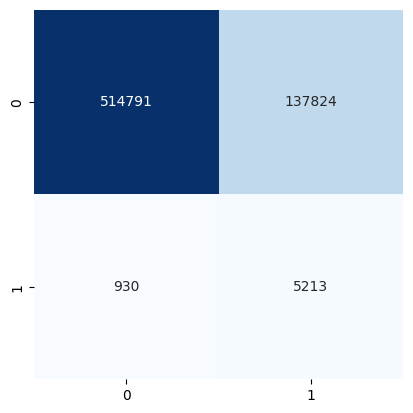

In [ ]:
conf_mat2 = confusion_matrix(y_test, brf.predict(X_test))
sns.heatmap(conf_mat2, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

# Balanced Bagging with hist gradiend boosting - NOT TO RUN

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
bbc = BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(random_state=42),
        n_estimators=10, # να βαλω λιγοτερους (default = 10) γτ η προβλεψη παιρνει πολυ ωρα ήταν 100
        random_state=42,
        n_jobs=-1,
)
bbc.fit(X_train, y_train)
bbc.score(X_test, y_test)

0.7611429386815796

<Axes: >

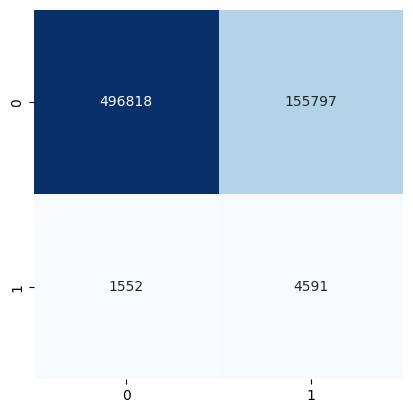

In [ ]:
conf_mat3 = confusion_matrix(y_test, bbc.predict(X_test))
sns.heatmap(conf_mat3, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

#Ridge Classifier - NOT TO RUN

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
#RidgeClassifier(random_state=42, class_weight='balanced').get_params(deep=True)

In [ ]:
#parameters = [ { 'alpha':[0.1,0.4,0.5,0.6,0.8],
 #                 'max_iter':[50,100,200]}]

In [ ]:
CLF =  RidgeClassifier(random_state=42, alpha=0.8, max_iter=200, class_weight='balanced')
#Reg2 = HalvingGridSearchCV(CLF, parameters,random_state=0,n_jobs=-1,aggressive_elimination=True)
#Reg2.fit(X_train, y_train) #θελει ενα τεταρτο να το τρεξεις εχω τις απαντησεις πανω

{'alpha': 0.8, 'max_iter': 200}

In [ ]:
#building a dataframe from cross-validation data
#df_cv_scores2=pd.DataFrame(Reg2.cv_results_).sort_values(by='rank_test_score')
#selecting specific columns to create a view
#df_cv_scores2[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
 #      'split3_test_score', 'split4_test_score', 'mean_test_score',\
  #     'std_test_score', 'rank_test_score']].head()

#Tuning hgbc - NOT TO RUN

In [ ]:
#HistGradientBoostingClassifier(random_state=42).get_params(deep=True)


In [ ]:
parameters = [ { 'learning_rate':[0.3,0.4,0.5,0.6],
                  #'max_depth':[1,3,5],
                  #'max_iter':[50,100,200],
                 'l2_regularization':[2,3,4,5]} ]

Με το grid search η απάντηση είναι \\
{'l2_regularization': 3, 'learning_rate': 0.5}
ήταν {'l2_regularization': 2, 'learning_rate': 0.4}

In [ ]:
HGB = HistGradientBoostingClassifier(random_state=0)
Reg2 = HalvingGridSearchCV(HGB, parameters,random_state=0,n_jobs=-1,aggressive_elimination=True,scoring='balanced_accuracy')
Reg2.fit(X_train, y_train) #θελει ενα τεταρτο να το τρεξεις εχω τις απαντησεις πανω

HalvingGridSearchCV(aggressive_elimination=True,
                    estimator=HistGradientBoostingClassifier(random_state=0),
                    n_jobs=-1,
                    param_grid=[{'l2_regularization': [2, 3, 4, 5],
                                 'learning_rate': [0.3, 0.4, 0.5, 0.6]}],
                    random_state=0, scoring='balanced_accuracy')

In [ ]:
#building a dataframe from cross-validation data
df_cv_scores2=pd.DataFrame(Reg2.cv_results_).sort_values(by='rank_test_score')
#selecting specific columns to create a view
df_cv_scores2[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,"{'l2_regularization': 3, 'learning_rate': 0.5}",0.565498,0.563266,0.565491,0.560204,0.564524,0.563797,0.001974,1
20,"{'l2_regularization': 3, 'learning_rate': 0.6}",0.558310,0.543771,0.554391,0.552015,0.558342,0.553366,0.005369,2
21,"{'l2_regularization': 3, 'learning_rate': 0.5}",0.550259,0.544108,0.551253,0.550460,0.554920,0.550200,0.003480,3
16,"{'l2_regularization': 5, 'learning_rate': 0.6}",0.554308,0.542264,0.544648,0.552369,0.551812,0.549080,0.004727,4
18,"{'l2_regularization': 4, 'learning_rate': 0.5}",0.552427,0.544429,0.545589,0.548213,0.550265,0.548185,0.002938,5


In [ ]:
Reg2.best_params_

{'l2_regularization': 3, 'learning_rate': 0.5}

#Stacking Classifier - NOT TO RUN

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
bbc = BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(random_state=42, l2_regularization= 3, learning_rate= 0.5),
        n_estimators=10, # να βαλω λιγοτερους (default = 10) γτ η προβλεψη παιρνει πολυ ωρα ήταν 100
        random_state=42,
        n_jobs=-1,
)

In [ ]:
brf = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
Class_st = StackingClassifier(estimators=[("BalancedBaggingClassifier", bbc),
                                       ("BalancedRandomForestClassifier", brf)],
                           final_estimator=CLF, cv=5,n_jobs=-1)

In [ ]:
Class_st.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed

StackingClassifier(cv=5,
                   estimators=[('BalancedBaggingClassifier',
                                BalancedBaggingClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=3,
                                                                                                   learning_rate=0.5,
                                                                                                   random_state=42),
                                                          n_jobs=-1,
                                                          random_state=42)),
                               ('BalancedRandomForestClassifier',
                                BalancedRandomForestClassifier(n_jobs=-1,
                                                               random_state=42))],
                   final_estimator=RidgeClassifier(alpha=0.8,
                                                   class_weight='balanced',
                                                   max_iter=200,
                                                   random_state=42))

In [ ]:
Class_st.score(X_test, y_test)

0.8063583288552093

In [ ]:
# balanced accurancy
balanced_accuracy_score(y_test, Class_st.predict(X_test))

0.8201085732317153

<Axes: >

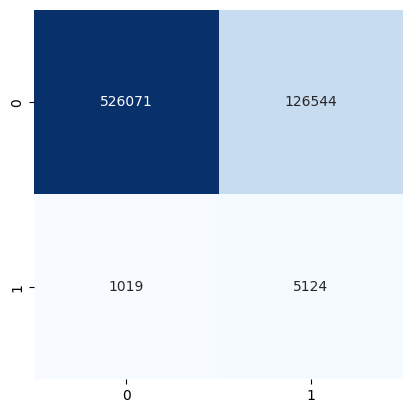

In [ ]:
conf_mat4 = confusion_matrix(y_test, Class_st.predict(X_test))
sns.heatmap(conf_mat4, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
pred_class = Class_st.predict(X_test)
print(rmsle(X_test, pred_class))

#k-fold cross-validation for models - NOT TO RUN

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

In [ ]:
cv = ShuffleSplit(n_splits=30, test_size=0.1)
cv_results = cross_validate(HGB, features, target,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=-1)
cv_results = pd.DataFrame(cv_results)

In [ ]:
#transform the negative mean absolute error into a positive mean absolute error
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
scores.plot.hist(bins=50, edgecolor="black", density=True)
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

In [ ]:
#validation curve
%%time
from sklearn.model_selection import validation_curve

In [ ]:
max_depth = [5, 10, 15, 20, 25,40]
train_scores, test_scores = validation_curve(
    HGB, features, target, param_name="max_depth", param_range=max_depth,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1)
train_errors, test_errors = -train_scores, -test_scores

In [ ]:
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of HGB")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for HGB")

#Δοκιμη για encode και μοντελο - NOT TO RUN

https://stackoverflow.com/questions/66719463/how-to-recover-input-categorical-symbols-from-scikit-learn-predict-proba

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import joblib

# while training
X = # your_categorical_features
Y = # your_target_labels

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X)
x = ordinal_encoder.transform(X)

label_encoder = LabelEncoder()
label_encoder.fit(Y)
y = label_encoder.transform(Y)

model = HistGradientBoostingClassifier(categorical_features=range(LENGTH-1), verbose=2,learning_rate=0.02).fit(x,y)
# save label_encoder object
joblib.dump(label_encoder, label_encoder_filename)
# save ordinal_encoder object
joblib.dump(ordinal_encoder, ordinal_encoder_filename)


In [ ]:
# later while predicting
import joblib

# load label_encoder object
label_encoder = joblib.load(label_encoder_filename)
# load ordinal_encoder object
ordinal_encoder = joblib.load(ordinal_encoder_filename)

X = # your values to predict
x = ordinal_encoder.transform(X)

predictions = model.predict(x)
prediction_pobas = model.predict_proba(x)
p_labels = label_encoder.inverse_transform(predictions)

proba_list = []
for idx in range(len(prediction_pobas)):
    proba_list.append(dict([*zip(label_encoder.classes_, prediction_pobas[idx])]))

# access prediction probability by
target_A_probability = proba_list[0]['target_A']

# To use predicted value to call predict_proba again encode using ordinal_encoder
X = # your new values to predict
x = ordinal_encoder.transform(X)

# tuning stacking - NOT TO RUN

## tuning random forest

In [ ]:
brf = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
parameters1 = [ { 'n_estimators': [50,100,200],
                  #'max_iter':[50,100,200],
                  'ccp_alpha':[0,0.5,0.9]}]

In [ ]:
Reg3 = HalvingGridSearchCV(brf, parameters1,random_state=0,n_jobs=-1,aggressive_elimination=True,scoring='balanced_accuracy')
Reg3.fit(X_train, y_train) #θελει ενα τεταρτο να το τρεξεις εχω τις απαντησεις πανω

In [ ]:
#building a dataframe from cross-validation data
df_cv_scores3=pd.DataFrame(Reg3.cv_results_).sort_values(by='rank_test_score')
#selecting specific columns to create a view
df_cv_scores3[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head()

In [ ]:
Reg3.best_params_

{'ccp_alpha': 0, 'n_estimators': 200}

# **tuned stacker**

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import StackingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
train_data.head()

TOTAL_SUPPLIER  \
ACCT_NBR                                           SUCCESSOR                   
000A31FE38C6F648845941B642E287FE020000009A47816... 1                       1   
                                                   1                       1   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                       1   
                                                   1                       1   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                       1   

                                                              LAST_SUPPLIER  \
ACCT_NBR                                           SUCCESSOR                  
000A31FE38C6F648845941B642E287FE020000009A47816... 1                   15.0   
                                                   1                   15.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                   15.0   
                                                   1                   15.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                   15.0   

                                                              SUPPLIER  \
ACCT_NBR                                           SUCCESSOR             
000A31FE38C6F648845941B642E287FE020000009A47816... 1              15.0   
                                                   1              15.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1              15.0   
                                                   1              15.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1              15.0   

                                                              START_DATE  \
ACCT_NBR                                           SUCCESSOR               
000A31FE38C6F648845941B642E287FE020000009A47816... 1                 0.0   
                                                   1                 0.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                 0.0   
                                                   1                 0.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                 0.0   

                                                              TOTAL_REQUEST_TYPE  \
ACCT_NBR                                           SUCCESSOR                       
000A31FE38C6F648845941B642E287FE020000009A47816... 1                           4   
                                                   1                           4   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                          10   
                                                   1                          10   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                          18   

                                                              LAST_REQUEST_TYPE  \
ACCT_NBR                                           SUCCESSOR                      
000A31FE38C6F648845941B642E287FE020000009A47816... 1                        0.0   
                                                   1                        0.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                        0.0   
                                                   1                        0.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                        2.0   

                                                              TOTAL_MS_METER_NBR  \
ACCT_NBR                                           SUCCESSOR                       
000A31FE38C6F648845941B642E287FE020000009A47816... 1                           2   
                                                   1                           2   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                           2   
                                                   1                           2   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                           1   

                                                              CSS_MS_HS_USE  \
ACCT_NBR                                           SUCCE

In [ ]:
X_train = train_data.drop('target',axis=1)
X_train.head()

TOTAL_SUPPLIER  \
ACCT_NBR                                           SUCCESSOR                   
000A31FE38C6F648845941B642E287FE020000009A47816... 1                       1   
                                                   1                       1   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                       1   
                                                   1                       1   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                       1   

                                                              LAST_SUPPLIER  \
ACCT_NBR                                           SUCCESSOR                  
000A31FE38C6F648845941B642E287FE020000009A47816... 1                   15.0   
                                                   1                   15.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                   15.0   
                                                   1                   15.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                   15.0   

                                                              SUPPLIER  \
ACCT_NBR                                           SUCCESSOR             
000A31FE38C6F648845941B642E287FE020000009A47816... 1              15.0   
                                                   1              15.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1              15.0   
                                                   1              15.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1              15.0   

                                                              START_DATE  \
ACCT_NBR                                           SUCCESSOR               
000A31FE38C6F648845941B642E287FE020000009A47816... 1                 0.0   
                                                   1                 0.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                 0.0   
                                                   1                 0.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                 0.0   

                                                              TOTAL_REQUEST_TYPE  \
ACCT_NBR                                           SUCCESSOR                       
000A31FE38C6F648845941B642E287FE020000009A47816... 1                           4   
                                                   1                           4   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                          10   
                                                   1                          10   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                          18   

                                                              LAST_REQUEST_TYPE  \
ACCT_NBR                                           SUCCESSOR                      
000A31FE38C6F648845941B642E287FE020000009A47816... 1                        0.0   
                                                   1                        0.0   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                        0.0   
                                                   1                        0.0   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                        2.0   

                                                              TOTAL_MS_METER_NBR  \
ACCT_NBR                                           SUCCESSOR                       
000A31FE38C6F648845941B642E287FE020000009A47816... 1                           2   
                                                   1                           2   
000A31FE38C6F648845941B642E287FE020000005957B02... 1                           2   
                                                   1                           2   
000A31FE38C6F648845941B642E287FE02000000A271B69... 1                           1   

                                                              CSS_MS_HS_USE  
ACCT_NBR                                           SUCCES

In [ ]:
y_train = train_data['target']
y_train.head()

ACCT_NBR                                                                                                                                  SUCCESSOR
000A31FE38C6F648845941B642E287FE020000009A478165A45D73FAC2A46FF7C1808F6EA653DEACA09B9FC0E7CC90F3A1DF39D2392ED13F7DD066373D372565A16193F0  1            0
                                                                                                                                          1            0
000A31FE38C6F648845941B642E287FE020000005957B0288491493DA8FD916013F6C23DB2DAD144D0C2CA6CBB1208BBABCB32E0619FE005D9C5E875EFCD2E790B9BD77F  1            0
                                                                                                                                          1            0
000A31FE38C6F648845941B642E287FE02000000A271B69D66133E44142D7876ACCFEA14D5A7BFC64E7F0EFF438BC84BDD1E08B3412B973579F8882E9489EA624745AC00  1            0
Name: target, dtype: int64

In [ ]:
bbc = BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(random_state=42, l2_regularization= 3, learning_rate= 0.5),
        n_estimators=10, # να βαλω λιγοτερους (default = 10) γτ η προβλεψη παιρνει πολυ ωρα ήταν 100
        random_state=42,
        n_jobs=-1,
)
brf = BalancedRandomForestClassifier(n_estimators=200,random_state=42, n_jobs=-1)
CLF =  RidgeClassifier(random_state=42, alpha=0.8, max_iter=200, class_weight='balanced')

In [ ]:
#Class_st = StackingClassifier(estimators=[("BalancedBaggingClassifier", bbc),
##                                       ("BalancedRandomForestClassifier", brf)],
 #                          final_estimator=CLF, cv=5,n_jobs=-1)
brf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.de

BalancedRandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
brf.predict_proba(test_data)

array([[0.355     , 0.645     ],
       [0.705     , 0.295     ],
       [0.34251515, 0.65748485],
       ...,
       [0.8975    , 0.1025    ],
       [0.74069323, 0.25930677],
       [0.665     , 0.335     ]])

In [ ]:
Class_st.score(X_test, y_test)

0.8058118459282468

In [ ]:
# balanced accurancy
balanced_accuracy_score(y_test, Class_st.predict(X_test))

0.8211227966930905

<Axes: >

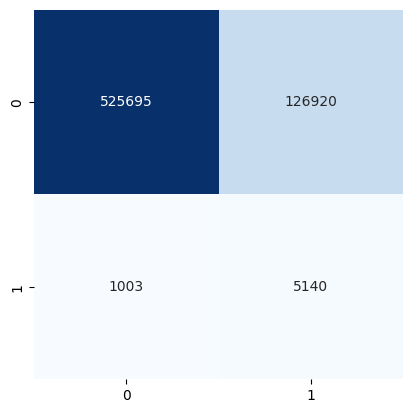

In [ ]:
conf_mat4 = confusion_matrix(y_test, Class_st.predict(X_test))
sns.heatmap(conf_mat4, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

ΘΕΛΕΙ ΚΑΝΑ 20ΛΕΠΤΟ ΝΑ ΤΡΕΞΕΙ \\
ΑΠΟΤΕΛΕΣΜΑΤΑ: \\
ACC: 0.8058118459282468 \\
BALANCED ACC: 0.8211227966930905